In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
import pandas as pd
print(boston.feature_names)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
# 目的変数追加
boston_df['PRICE'] = boston.target
boston_df.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
#統計量
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


MAX: 50.0
MIN: 5.0


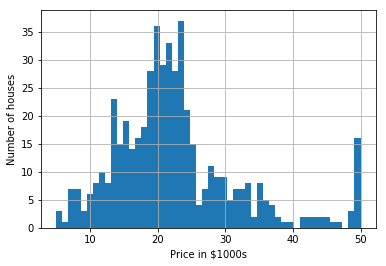

In [12]:
import matplotlib.pyplot as plt
# 全体像
# import seaborn as sns
# sns.pairplot(boston_df)

print("MAX: {}".format(max(boston_df['PRICE'])))
print("MIN: {}".format(min(boston_df['PRICE'])))
plt.hist(boston_df['PRICE'], bins=50)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')
plt.grid()



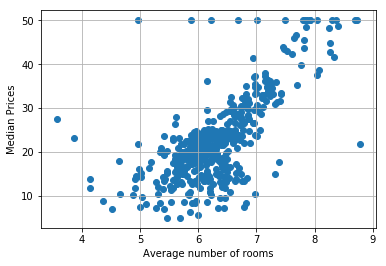

In [13]:
plt.scatter(boston_df['RM'], boston_df['PRICE'])
plt.xlabel('Average number of rooms')
plt.ylabel('Median Prices')
plt.grid()

In [62]:
# 学習
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#線形回帰（単回帰分析）
model = LinearRegression()
x = boston_df['RM']
y = boston_df['PRICE']
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=0)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
# 予測
#平均二乗誤差
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
print('mse train data: {}'.format(mse(y_true=y_train, y_pred=y_train_pred)))
print('mse  test data: {}'.format(mse(y_true=y_test, y_pred=y_test_pred)))

#決定関数
print('r2 train data: {}'.format(r2_score(y_train, y_train_pred)))
print('r2  test data: {}'.format(r2_score(y_test, y_test_pred)))

mse train data: 45.38463176403127
mse  test data: 41.516252725080626
r2 train data: 0.4890646535700074
r2  test data: 0.4713570505336723


In [145]:
# 多変量解析をしよう！
from sklearn.linear_model import LinearRegression
mlt_model = LinearRegression()
# x_mlt = boston_df.drop('PRICE', 1) #PRICE列を削除（つまり全パラメータを説明変数として使う）
# y_mlt = boston_df['PRICE']
# mlt_model.fit(x_mlt, y_mlt)

# coeff_df = pd.DataFrame()
# coeff_df["Features"] = boston_df.columns[:-1]
# coeff_df['Coefficient_Estimate'] = mlt_model.coef_
# coeff_df

normalized_boston_df = boston_df.apply(lambda x:(x - np.mean(x)) / (np.max(x) - np.min(x)))
x_mlt = normalized_boston_df.drop('PRICE', 1)
y_mlt = normalized_boston_df['PRICE']
mlt_model.fit(x_mlt, y_mlt)
coeff_df = pd.DataFrame()
coeff_df["Features"] = normalized_boston_df.columns[:-1]
coeff_df["Coefficient_Estimate"] = abs(mlt_model.coef_)
# head4_score = sorted(coeff_df["Coefficient_Estimate"], reverse=True)[:4]
# use_df = coeff_df[coeff_df.Features for i in head4_score if coeff_df.Coefficient_Esimate == i]
use_features = coeff_df.sort_values(by=["Coefficient_Estimate"], ascending=False).head(4)["Features"]
# for i in use_features:
#     print(type(i))
# type(use_features)
# itr = iter(use_features)
# itr.__next__()
x_mlt = normalized_boston_df[use_features]

In [146]:
x_mlt_train, x_mlt_test, y_mlt_train, y_mlt_test = train_test_split(x_mlt, y_mlt, test_size=0.45, random_state=0)
mlt_lreg = LinearRegression()
mlt_lreg.fit(x_mlt_train, y_mlt_train)

print('train data: {}'.format(mlt_lreg.score(x_mlt_train, y_mlt_train)))
print('test data: {}'.format(mlt_lreg.score(x_mlt_test, y_mlt_test)))

train data: 0.6654838569966446
test data: 0.6433986208222711
